In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from lifelines.datasets import load_waltons
from lifelines import KaplanMeierFitter

sns.set_style('darkgrid')
%matplotlib inline
np.random.seed(42)

In [2]:
df = load_waltons() # returns a Pandas DataFrame

print(df.head())

T = df['T']
E = df['E']

      T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137
2  13.0  1  miR-137
3  13.0  1  miR-137
4  19.0  1  miR-137


In [3]:

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)  # or, more succiently, kmf.fit(T, E)

<lifelines.KaplanMeierFitter: fitted with 163 observations, 7 censored>

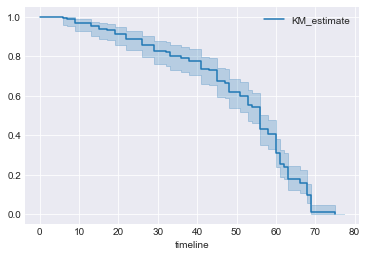

In [4]:
kmf.survival_function_
kmf.median_
kmf.plot()

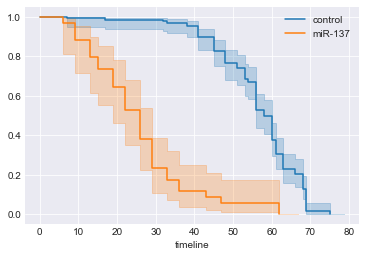

In [5]:
groups = df['group']
ix = (groups == 'miR-137')

kmf.fit(T[~ix], E[~ix], label='control')
ax = kmf.plot()

kmf.fit(T[ix], E[ix], label='miR-137')
kmf.plot(ax=ax)

In [6]:
from lifelines.datasets import load_regression_dataset
regression_dataset = load_regression_dataset()

regression_dataset.head()

,var1,var2,var3,T,E
0,0.595170,1.143472,1.571079,14.785479,1
1,0.209325,0.184677,0.356980,7.336734,1
2,0.693919,0.071893,0.557960,5.271527,1
3,0.443804,1.364646,0.374221,11.684168,1
4,1.613324,0.125566,1.921325,7.637764,1


n=200, number of events=189

       coef  exp(coef)  se(coef)      z      p  lower 0.95  upper 0.95    
var1 0.2214     1.2478    0.0743 2.9807 0.0029      0.0758      0.3669  **
var2 0.0508     1.0521    0.0829 0.6129 0.5400     -0.1117      0.2133    
var3 0.2187     1.2444    0.0758 2.8851 0.0039      0.0701      0.3672  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.580


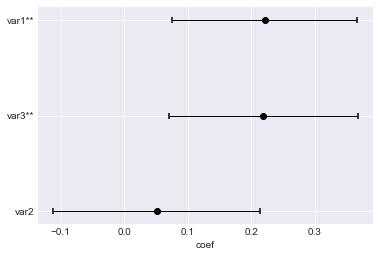

In [7]:
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(regression_dataset, 'T', event_col='E')
cph.print_summary()

"""
n=200, number of events=189

       coef  exp(coef)  se(coef)      z      p  lower 0.95  upper 0.95
var1 0.2213     1.2477    0.0743 2.9796 0.0029      0.0757      0.3669  **
var2 0.0509     1.0522    0.0829 0.6139 0.5393     -0.1116      0.2134
var3 0.2186     1.2443    0.0758 2.8836 0.0039      0.0700      0.3672  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Concordance = 0.580
"""

cph.plot()

In [8]:
# Using Aalen's Additive model
from lifelines import AalenAdditiveFitter
aaf = AalenAdditiveFitter(fit_intercept=False)
aaf.fit(regression_dataset, 'T', event_col='E')

<lifelines.AalenAdditiveFitter: fitted with 200 observations, 11 censored>

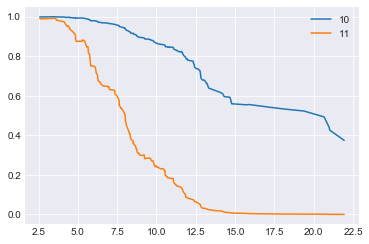

In [9]:
X = regression_dataset.drop(['E', 'T'], axis=1)
aaf.predict_survival_function(X.iloc[10:12]).plot()  # get the unique survival functions of two subjects

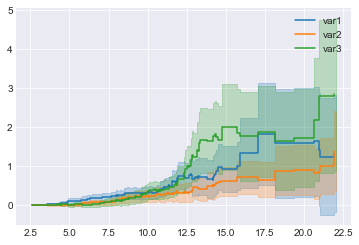

In [10]:
aaf.plot()